In [1]:
# Import necessary librares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Dataset.
df = pd.read_excel("customer_churn_large_dataset.xlsx")

In [3]:
df.head() # First 5 rows and columns.

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
 # To show basic informations of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [5]:
df.shape #To Check Rows and columns

(100000, 9)

In [6]:
df.describe() # Check statistical analysis.

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
df.isnull().sum() # Check null values.

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [8]:
df.duplicated().sum()  # To check duplicate values.

0

In [9]:
df.Churn.unique() # To Check unique values.

array([0, 1], dtype=int64)

In [10]:
df['Churn'].value_counts() # To show the count of unique values of the column 'churn'

0    50221
1    49779
Name: Churn, dtype: int64

In [11]:
df['Location'].value_counts() # To check unique values.

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

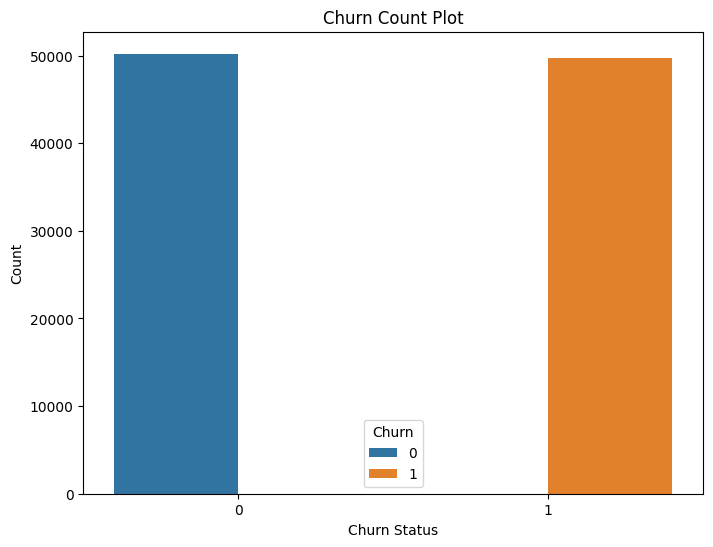

In [12]:
plt.figure(figsize=(8, 6))

# Create a countplot with hue for the 'Churn' column
sns.countplot(data=df, x='Churn', hue='Churn')

# Add labels and title
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Count Plot')

# Show the plot
plt.show()

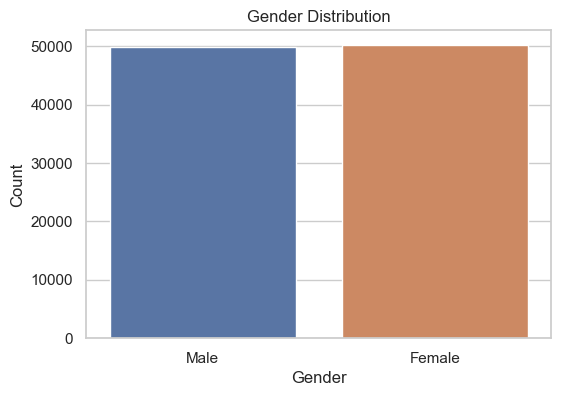

In [13]:
# Create a count plot for the 'Gender' column
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Show the plot
plt.show()

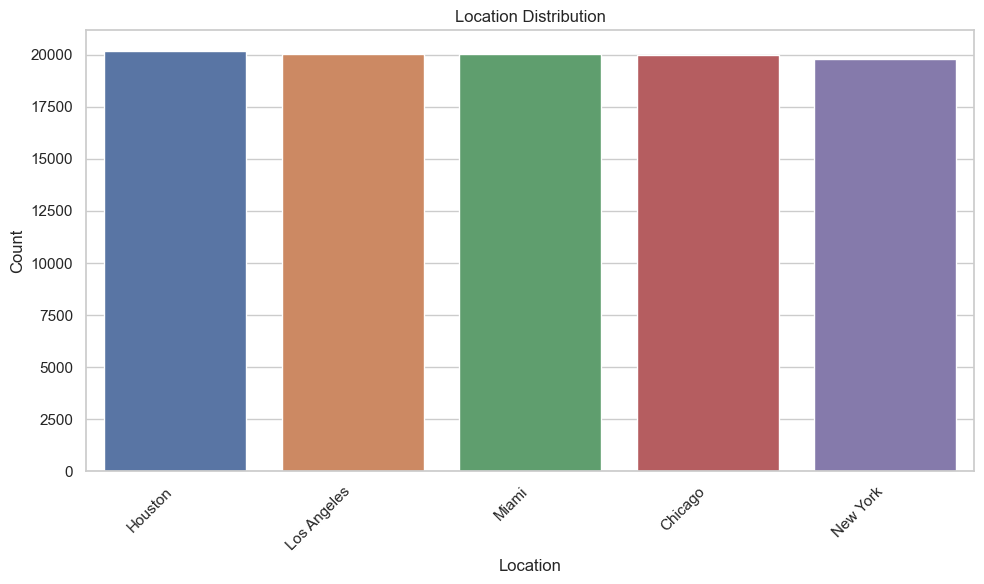

In [14]:
# Create a count plot for the 'Location' column
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [16]:
# Drop Unwanted Columns
df.drop(columns = ['CustomerID','Name'],inplace = True)

In [17]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


**One-Hot Encoding**

In [18]:
# Perform one-hot encoding on the 'Gender' and 'Location' column
df = pd.get_dummies(df, columns=['Gender','Location'], drop_first=True)

In [19]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


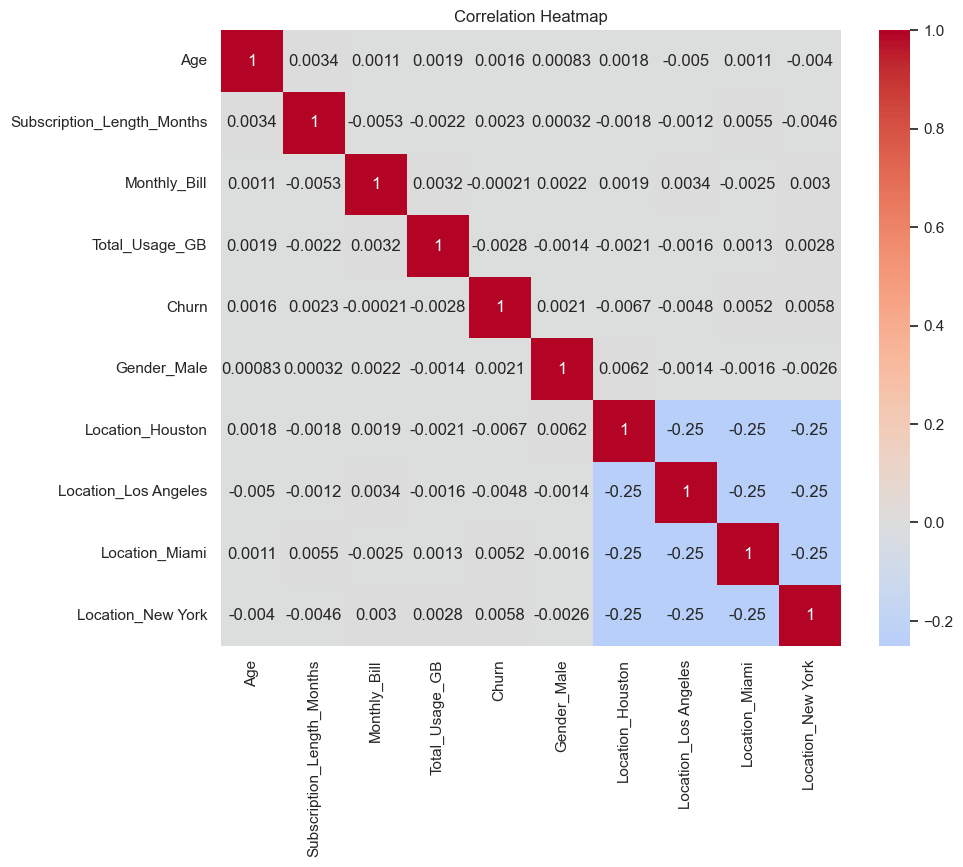

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [21]:
X = df.drop('Churn',axis = 1)
y = df['Churn']

**Splitting the Dataset into Train set and Test set.**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

**Feature Scaling**

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[ 0.65344669, -1.08272837,  0.96025455, ..., -0.50027342,
        -0.50236218,  2.00871348],
       [-1.04827574,  1.66388226,  0.83962354, ..., -0.50027342,
        -0.50236218,  2.00871348],
       [ 0.84979927, -0.07081919, -0.63217363, ..., -0.50027342,
        -0.50236218, -0.49783108],
       ...,
       [ 1.63520963, -1.51640373,  0.55188892, ..., -0.50027342,
        -0.50236218, -0.49783108],
       [ 0.71889755, -0.07081919,  1.19212316, ..., -0.50027342,
        -0.50236218, -0.49783108],
       [-1.17917747,  0.65197308,  0.26365992, ...,  1.99890691,
        -0.50236218, -0.49783108]])

In [28]:
X_test

array([[ 0.26074151, -0.21537764,  1.15702152, ..., -0.50027342,
        -0.50236218, -0.49783108],
       [ 0.32619237,  0.07373927, -1.20962042, ..., -0.50027342,
        -0.50236218,  2.00871348],
       [-0.85192315, -1.08272837, -1.58535634, ...,  1.99890691,
        -0.50236218, -0.49783108],
       ...,
       [ 1.56975876,  0.07373927, -1.27290226, ..., -0.50027342,
         1.99059572, -0.49783108],
       [-0.65557057,  0.07373927,  1.48628484, ..., -0.50027342,
         1.99059572, -0.49783108],
       [ 1.56975876, -0.21537764, -1.68917811, ..., -0.50027342,
        -0.50236218, -0.49783108]])

**Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log = LogisticRegression()

In [31]:
log.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred1 = log.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score 

In [34]:
accuracy_score(y_test, y_pred1) 

0.5036

In [35]:
from sklearn.metrics import f1_score, precision_score,recall_score

In [36]:
precision_score(y_test,y_pred1)

0.49953488372093025

In [37]:
f1_score(y_test,y_pred1)

0.43092972601169327

In [38]:
recall_score(y_test,y_pred1)

0.3788932567281524

**SVM**

In [39]:
from sklearn import svm

In [40]:
svm = svm.SVC()

In [41]:
svm.fit(X_train,y_train)

SVC()

In [42]:
 y_pred2 = svm.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.49935

In [44]:
precision_score(y_test, y_pred2)

0.49428002984332253

In [45]:
f1_score(y_test,y_pred2)

0.4425764070589545

**RandomForest**

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred3 = rf.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred3)

0.49395

General Machine Learning is not showing that good of a result, but actually that's very logical as there was not any relation between features and Machine Learning tries to find the best line matching the relation. So, I hadn't expected anything more.

**Deep Learning**

In [53]:
import tensorflow as tf
from tensorflow import keras

In [62]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
X_train.shape

(80000, 9)

In [67]:
## Part 2 Now lets create ANN.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [68]:
# Let's initialize the ANN
classifier = Sequential()

In [69]:
## Adding the input Layer
classifier.add(Dense(units = 11,activation = 'relu'))

In [70]:
## Adding First Input Layer.
classifier.add(Dense(units = 7,activation = 'relu'))

In [71]:
## Adding the Second hidden layer.
classifier.add(Dense(units = 6,activation = 'relu'))

In [72]:
## Adding the second hidden layer.
classifier.add(Dense(1,activation = 'sigmoid'))

In [73]:
classifier.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [74]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [75]:
## Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False,
)

In [77]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.33,batch_size=10,epochs = 1000,callbacks = early_stopping)

Epoch 1/1000
5360/5360 [==============================] - 24s 4ms/step - loss: 0.6943 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.5036
Epoch 2/1000
5360/5360 [==============================] - 24s 4ms/step - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6936 - val_accuracy: 0.4988
Epoch 3/1000
5360/5360 [==============================] - 21s 4ms/step - loss: 0.6931 - accuracy: 0.5041 - val_loss: 0.6935 - val_accuracy: 0.4972
Epoch 4/1000
5360/5360 [==============================] - 21s 4ms/step - loss: 0.6930 - accuracy: 0.5070 - val_loss: 0.6937 - val_accuracy: 0.4966
Epoch 5/1000
5360/5360 [==============================] - 22s 4ms/step - loss: 0.6930 - accuracy: 0.5064 - val_loss: 0.6934 - val_accuracy: 0.5004
Epoch 6/1000
5360/5360 [==============================] - 23s 4ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 7/1000
5360/5360 [==============================] - 23s 4ms/step - loss: 0.6929 - accuracy: 0.5094 - val_loss: 0

Even a well curated Deep Learning model was not able to get accuracy over 51% on validation set. At the very least this was expected with the dataset it was training on.

In [78]:
# Deploy the model using `pickle` module
import pickle

pickle.dump(rf, open("model.pkl", 'wb')) 